In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hindu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [3]:
iphone13_reviews

['\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.\n',
 '\ni was completely satisfied with amazons delivery, it was safe. the phone is amazing\n',
 '\nI have started using iPhone 

In [4]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [5]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [6]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'i', 'was', 'completely', 'satisfied', 'with', 'amazons', 'delivery', 'it', 'was', 'safe', 'the', 'phone', 'is', 'amazing', 'i', 'was', 'completely', 'satisfied', 'with', 'amazons', 'delivery', 'it', 'was', 'safe', 'the', 'phone', 'is', 'amazing', 'i', 'have', 'started', 'using', 'iphone', 'from', 'series', 'and', 'since', 'then', 'this', 'is', 'th', 'iphone', 'which', 'i', 'upgrade', 'and', 'i', 'must', 'say', 'till', 'date', 'this', 'has', 'got', 'the', 'best', 'battery', 'i', 'have', 'observed', 'in', 'any', 'of', 'my', 'previous', 'iphones', 'camera', 'quality', 'you', 'can', 't', 'even', 'think', 'of', 'comparing', 'it', 'with', 'any', 'other', 'phone', 'in', 'the', 'world', 'you', 'definitely', 'don', 't', 'need', 'to', 'carry', 'a', 'fslr', 'or', 'a', 'video', 'cam', 'after', 'you', 'own', 'this', 'piece', 'you', 'can', 'literally', 'make', 'a', 'professional', 'movie', 'from', 'its', 'camera', 'the', 'only', 'thing', 'is', 'that', 'you', 'need', 'to', 'shell', 'out', 'hell

In [9]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone13_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

C:\Users\hindu\anaconda3\lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [8]:
!python -m spacy download en_core_web_md

     -------------------------------------- 42.8/42.8 MB 915.4 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [12]:
with open(r'C:\Users\hindu\Downloads\stop.txt', 'r') as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [13]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

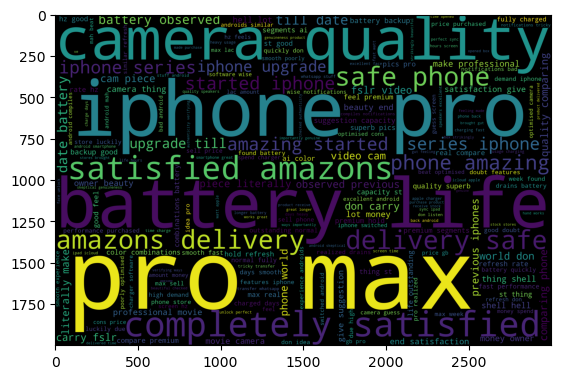

In [14]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [16]:
with open(r'C:\Users\hindu\Downloads\positive-words.txt', 'r') as pos:
    poswords = pos.read().split("\n")

In [17]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

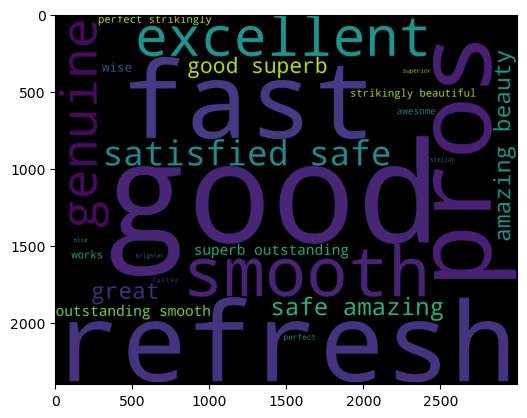

In [18]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [21]:
# negative words: Choose path for -ve words stored in system
with open(r'C:\Users\hindu\Downloads\negative-words.txt', 'r') as neg:
    negwords = neg.read().split("\n")

In [22]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

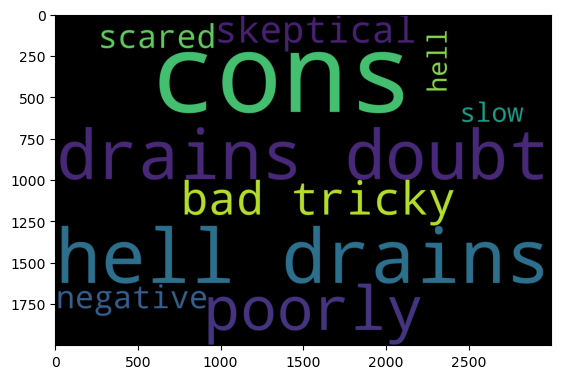

In [23]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)

In [27]:
pip install afinn

     -------------------------------------- 52.6/52.6 kB 388.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53437 sha256=fee12f9e6c7d29493eb95fde9ca155aa8a4092c21c13bf1257a3a91399f7d1e2
  Stored in directory: c:\users\hindu\appdata\local\pip\cache\wheels\f0\cb\2b\11d9c0e366428dd38f54a5e14c6252edcc669feec72c2d5ef8
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Emotion Lexicon - Affin
import pandas as pd
affin=pd.read_csv(r'C:\Users\hindu\Downloads\Afinn.csv', sep=',', encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [34]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [35]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [36]:
# manual testing
calculate_sentiment(text='great')

3

In [37]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0   -2
1   -2
2   -2
Name: sentiment_value, dtype: int64